In [1]:
# Importing Modules

import os 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.image import imread

import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.preprocessing import image

from sklearn.metrics import classification_report, confusion_matrix

2024-05-22 13:13:47.999659: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-22 13:13:47.999767: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-22 13:13:48.166486: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
data_dir = '/kaggle/input/malaria-cell-images-dataset/cell_images'

In [ ]:
print(os.listdir(data_dir))

In [3]:
test_path = data_dir + "/test/"
train_path = data_dir + "/train/"

In [4]:
test_path

'/kaggle/input/malaria-cell-images-dataset/cell_images/test/'

In [5]:
train_path

'/kaggle/input/malaria-cell-images-dataset/cell_images/train/'

In [6]:
print(os.listdir(test_path))

['uninfected', 'parasitized']


In [7]:
print(os.listdir(train_path))

['uninfected', 'parasitized']


In [ ]:
len(os.listdir(test_path + "/parasitized/")) 

In [ ]:
len(os.listdir(test_path + "/uninfected/")) 

In [ ]:
len(os.listdir(train_path + "/parasitized/"))   

In [ ]:
len(os.listdir(train_path + "/uninfected/"))  

In [8]:
os.listdir(train_path + "/parasitized/")[0]

'C99P60ThinF_IMG_20150918_141001_cell_93.png'

In [9]:
os.listdir(test_path + "/parasitized/")[0]

'C68P29N_ThinF_IMG_20150819_134712_cell_55.png'

In [10]:
para_cell = test_path + "parasitized/" + "C68P29N_ThinF_IMG_20150819_134712_cell_55.png"
para_cell

'/kaggle/input/malaria-cell-images-dataset/cell_images/test/parasitized/C68P29N_ThinF_IMG_20150819_134712_cell_55.png'

In [11]:
imread(para_cell).max()

0.8862745

In [12]:
imread(para_cell).min()

0.0

In [13]:
imread(para_cell).shape

(136, 151, 3)

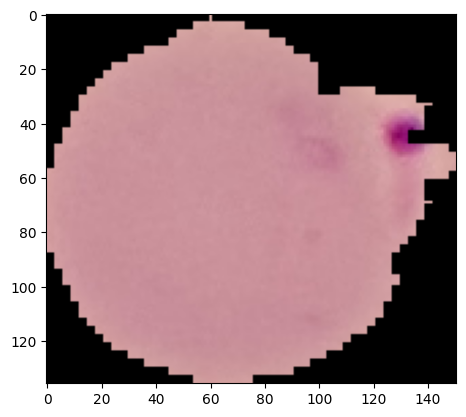

In [14]:
plt.imshow(imread(para_cell))

In [15]:
os.listdir(test_path + "/uninfected/")[0]

'C181P142ThinF_IMG_20151127_155722_cell_78.png'

In [16]:
uninfected_cell = test_path + "uninfected/" + "C181P142ThinF_IMG_20151127_155722_cell_78.png"

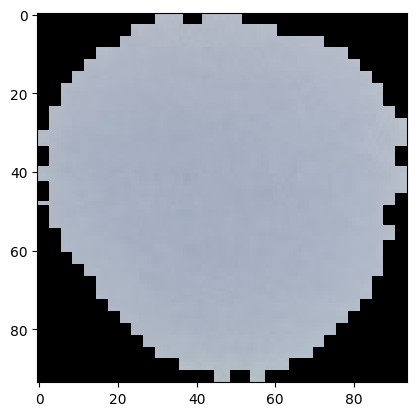

In [17]:
plt.imshow(imread(uninfected_cell))

In [18]:
dim1 = []
dim2 = []

for img_filename in os.listdir(test_path + "uninfected"):
    img = imread(test_path + "uninfected/" + img_filename)
    d1, d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [19]:
np.mean(dim1)

130.92538461538462

In [20]:
np.mean(dim2)

130.75

In [21]:
image_shape = (130, 130, 3)   # 130 * 130 * 3

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


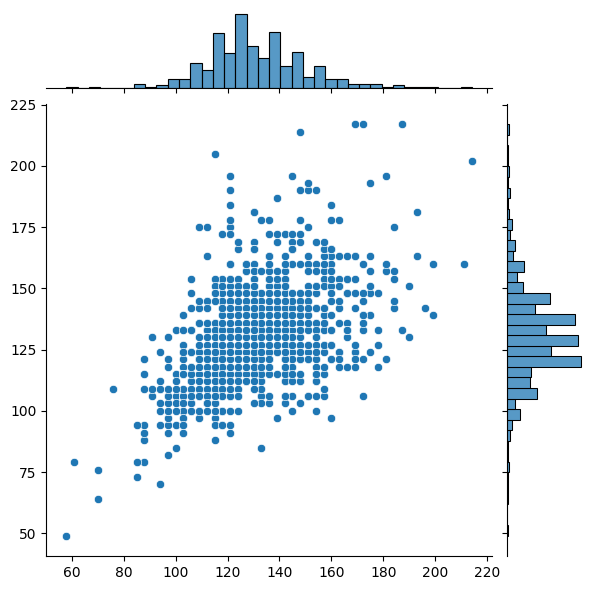

In [22]:
sns.jointplot(x=dim1, y=dim2)

In [23]:
# Image Preprocessing
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')

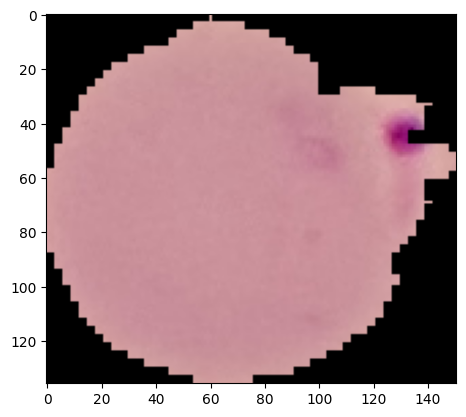

In [24]:
para_img = imread(para_cell)
plt.imshow(para_img)

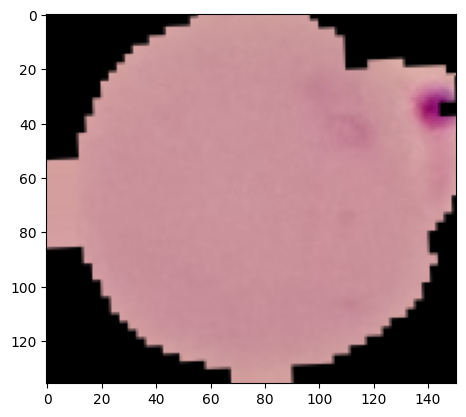

In [25]:
plt.imshow(image_gen.random_transform(para_img))

In [26]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [27]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [28]:
# Create the Mode
image_shape = (130, 130, 3)

In [29]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,662,209 (6.34 MB)

 Trainable params: 1,662,209 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
batch_size = 16

In [32]:
image_shape[:2]

(130, 130)

In [33]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [34]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               shuffle=False)

Found 2600 images belonging to 2 classes.


In [35]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [36]:
 # from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [39]:
results = model.fit(train_image_gen, epochs=20,
                    validation_data=test_image_gen,
                    callbacks=[early_stop])

Epoch 1/20
 497/1560 ━━━━━━━━━━━━━━━━━━━━ 2:24 136ms/step - accuracy: 0.5204 - loss: 3.6572

W0000 00:00:1716384194.800896     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1558/1560 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.5301 - loss: 1.8194

W0000 00:00:1716384326.210742     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1560/1560 ━━━━━━━━━━━━━━━━━━━━ 217s 139ms/step - accuracy: 0.5301 - loss: 1.8175 - val_accuracy: 0.5665 - val_loss: 0.6821
Epoch 2/20


W0000 00:00:1716384343.611717     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1560/1560 ━━━━━━━━━━━━━━━━━━━━ 158s 101ms/step - accuracy: 0.5679 - loss: 0.6853 - val_accuracy: 0.5904 - val_loss: 0.6740
Epoch 3/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 157s 100ms/step - accuracy: 0.5858 - loss: 0.6777 - val_accuracy: 0.5442 - val_loss: 0.6921
Epoch 4/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 158s 101ms/step - accuracy: 0.6045 - loss: 0.6546 - val_accuracy: 0.8981 - val_loss: 0.2927
Epoch 5/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 157s 100ms/step - accuracy: 0.9277 - loss: 0.2289 - val_accuracy: 0.9335 - val_loss: 0.2055
Epoch 6/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 156s 100ms/step - accuracy: 0.9372 - loss: 0.1940 - val_accuracy: 0.9262 - val_loss: 0.1906
Epoch 7/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 164s 104ms/step - accuracy: 0.9406 - loss: 0.1849 - val_accuracy: 0.9385 - val_loss: 0.1945
Epoch 8/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 156s 100ms/step - accuracy: 0.9438 - loss: 0.1831 - val_accuracy: 0.9400 - val_loss: 0.1771
Epoch 9/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 154s 99ms/step - accuracy: 0.94

In [40]:
model.save('malaria_detector.h5')

In [41]:
model.history.history

{'accuracy': [0.5469188094139099,
  0.5755669474601746,
  0.5888692736625671,
  0.6916419863700867,
  0.9303629994392395,
  0.9404199123382568,
  0.9433448314666748,
  0.946870744228363,
  0.9454683661460876,
  0.9463498592376709],
 'loss': [0.8473318219184875,
  0.6837721467018127,
  0.6778962016105652,
  0.5579426288604736,
  0.22202594578266144,
  0.18924562633037567,
  0.18154814839363098,
  0.17383000254631042,
  0.17313513159751892,
  0.1759103685617447],
 'val_accuracy': [0.5665384531021118,
  0.5903846025466919,
  0.5442307591438293,
  0.8980769515037537,
  0.9334615468978882,
  0.926153838634491,
  0.9384615421295166,
  0.9399999976158142,
  0.9307692050933838,
  0.9388461709022522],
 'val_loss': [0.6820605397224426,
  0.6740450263023376,
  0.6921047568321228,
  0.2926758825778961,
  0.20554840564727783,
  0.19060954451560974,
  0.19445624947547913,
  0.1771334409713745,
  0.4264841079711914,
  0.18124020099639893]}

<Axes: >

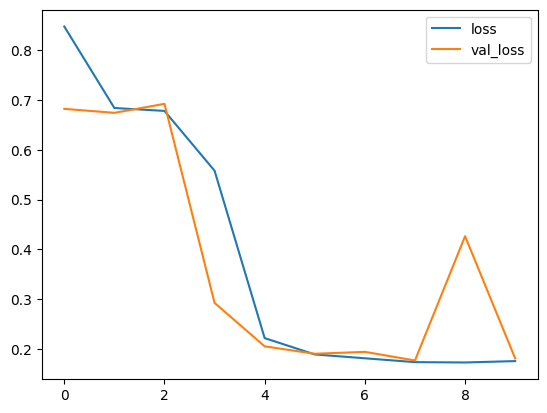

In [42]:
# Evaluating the Model
losses = pd.DataFrame(model.history.history)
losses[['loss', 'val_loss']].plot()

In [43]:
model.evaluate(test_image_gen)

163/163 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9204 - loss: 0.2423


[0.1880185902118683, 0.9419230818748474]

In [44]:
model.metrics_names

['loss', 'compile_metrics']

In [45]:
pred = model.predict(test_image_gen)

163/163 ━━━━━━━━━━━━━━━━━━━━ 15s 91ms/step


In [46]:
pred

array([[3.0758185e-03],
       [8.6615137e-06],
       [5.9859524e-04],
       ...,
       [9.7140288e-01],
       [9.8180646e-01],
       [9.6874142e-01]], dtype=float32)

In [47]:
predictions = pred > 0.5

In [48]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [49]:
len(pred)

2600

In [50]:
# from sklearn.metrics import classification_report, confusion_matrix

In [51]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [52]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1300
           1       0.91      0.97      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



In [54]:
print(confusion_matrix(test_image_gen.classes, predictions))

[[1178  122]
 [  44 1256]]


In [ ]:
# How to predict on a single image 

In [55]:
para_cell

'/kaggle/input/malaria-cell-images-dataset/cell_images/test/parasitized/C68P29N_ThinF_IMG_20150819_134712_cell_55.png'

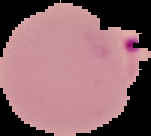

In [56]:
image.load_img(para_cell)

In [58]:
type(image.load_img(para_cell))

PIL.PngImagePlugin.PngImageFile

In [59]:
my_image = image.load_img(para_cell, target_size=image_shape)

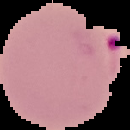

In [60]:
my_image

In [61]:
my_image_arr = image.img_to_array(my_image)

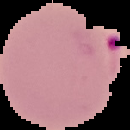

In [62]:
my_image

In [63]:
my_image_arr.shape   # one image (1, 130, 130, 3)

(130, 130, 3)

In [64]:
my_image_arr = np.expand_dims(my_image_arr, axis=0)

In [65]:
my_image_arr.shape

(1, 130, 130, 3)

In [66]:
model.predict(my_image_arr)   # parasitized

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 870ms/step


array([[0.0033812]], dtype=float32)

In [67]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}